In [84]:
import pandas as pd

df = pd.read_excel('../data/ARO1舊吸附劑資料.xlsx',sheet_name='品管')
cols = [
    'ARO1-LIMS-S704-BR_INDEX',
    'ARO1-LIMS-s704-744-C9',
    'ARO1-LIMS-s704-744-C10+',
    'ARO1-LIMS-s909-744-C9',
    'ARO1-LIMS-s909-744-C10+',
    'ARO1-LIMS-S909-BR_INDEX',
    ]
df = df.loc[:,cols]
for i in df.columns:
    df[i] = pd.to_numeric(df[i],errors='coerce')
df

,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-s909-744-C9,ARO1-LIMS-s909-744-C10+,ARO1-LIMS-S909-BR_INDEX
0,6.80,NaN,NaN,0.560000,0.000000,16.50
1,NaN,NaN,NaN,0.500000,0.000000,NaN
2,6.70,NaN,NaN,0.380685,NaN,16.41
3,6.20,200.0,NaN,0.000000,NaN,NaN
4,6.90,200.0,NaN,0.590236,0.000000,NaN
...,...,...,...,...,...,...
3420,2.33,0.0,0.0,0.084503,0.537422,NaN
3421,2.30,0.0,0.0,0.087302,0.523615,NaN
3422,2.26,0.0,0.0,0.086501,0.534307,NaN
3423,1.74,0.0,0.0,0.094300,0.525599,NaN


# 1.缺失值分析

In [85]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(20)


Your selected dataframe has 6 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
ARO1-LIMS-S909-BR_INDEX,3407,99.5
ARO1-LIMS-s909-744-C10+,30,0.9
ARO1-LIMS-s909-744-C9,27,0.8
ARO1-LIMS-s704-744-C10+,26,0.8
ARO1-LIMS-s704-744-C9,24,0.7
ARO1-LIMS-S704-BR_INDEX,10,0.3


In [86]:
for i in df.columns:
    print(len(df[i].dropna())/len(df))

0.997080291970803
0.992992700729927
0.9924087591240875
0.9921167883211679
0.9912408759124087
0.005255474452554744


# 2.相關度分析

In [87]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[:] = ss.fit_transform(df)
df.corr()

,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-s909-744-C9,ARO1-LIMS-s909-744-C10+,ARO1-LIMS-S909-BR_INDEX
ARO1-LIMS-S704-BR_INDEX,1.000000,0.011865,0.014982,0.026176,-0.028407,0.598432
ARO1-LIMS-s704-744-C9,0.011865,1.000000,0.977149,0.063557,-0.010589,0.054063
ARO1-LIMS-s704-744-C10+,0.014982,0.977149,1.000000,0.052750,-0.008867,NaN
ARO1-LIMS-s909-744-C9,0.026176,0.063557,0.052750,1.000000,-0.124385,0.050838
ARO1-LIMS-s909-744-C10+,-0.028407,-0.010589,-0.008867,-0.124385,1.000000,0.044280
ARO1-LIMS-S909-BR_INDEX,0.598432,0.054063,NaN,0.050838,0.044280,1.000000


# 3.折線圖分析

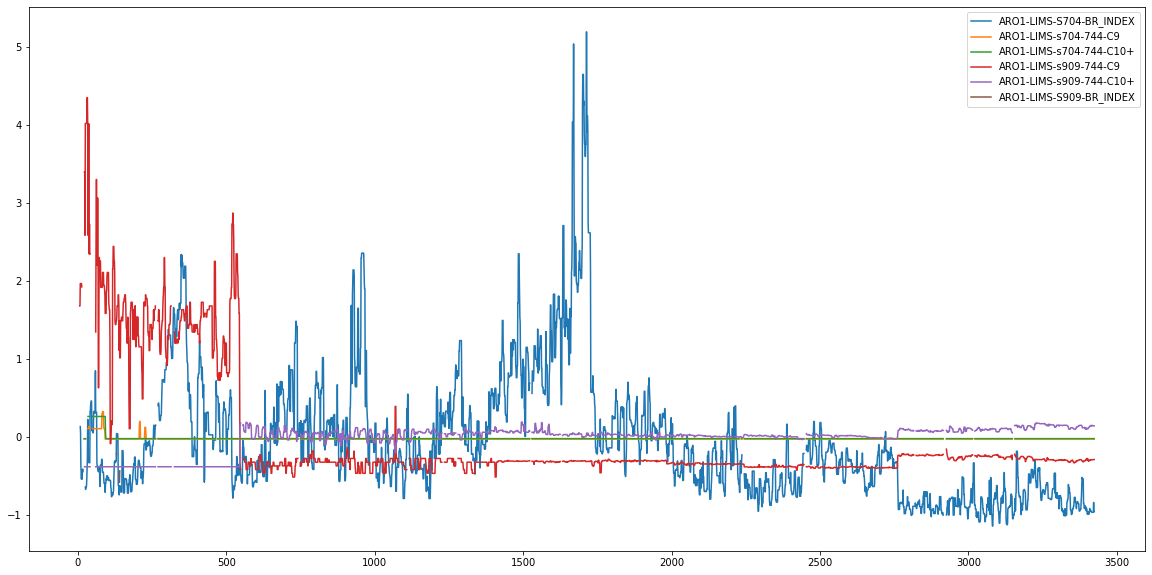

In [88]:
import matplotlib.pyplot as plt
n = 7
fig = plt.figure(figsize=(20,10))
for i in df.columns:
    plt.plot(df[i].rolling(n).median(),label=i)
plt.legend()
plt.show()